# Anomaly detection 

**Anomaly detection**  is aimed to capture anomaly records in high dimensional space. 

Applications examples: 
- Fraud detection 
- Monitoring computers state (CPU, Memory etc.)
- Predicting/preventing nanufacture failure
- Sanity check of data values 
- Preprocessing data to exclude noise(outliers) before training the model 
- Analyzing the amount of anomalies in subsets of data to detect certain patterns of similar groups
 
<img src = "outliers.png" height=500 width= 500 align="left">


# Gaussian Estimation

## What is a Distribution?

A **distribution** in statistics represents how the values of a random variable are spread or dispersed. It provides a complete description of the probabilities associated with the occurrence of different outcomes. In simple terms, it tells you how likely it is to observe a specific value or range of values. There are many types of distributions, each suitable for different kinds of data and underlying assumptions.

## Normal Distribution

The **Normal Distribution**, also known as the Gaussian distribution, is a continuous probability distribution that is symmetric around its mean. It is characterized by two parameters:

- **Mean (μ)**: Represents the center of the distribution.
- **Standard Deviation (σ)**: Determines the spread of the distribution and indicates how data are dispersed around the mean.

The shape of the normal distribution is bell-shaped, meaning that values near the mean occur more frequently than those far away from the mean.

### Why Consider the Normal Distribution?

- **Central Limit Theorem**: Under certain conditions, the sum of a large number of independent and identically distributed random variables tends toward a normal distribution, regardless of the original distribution. This universality makes the normal distribution applicable in many situations.
- **Statistical Inference**: Many statistical tests and estimation procedures assume normality due to its mathematically tractable properties, which simplify computations and enhance the reliability of statistical conclusions.
- **Modeling Real-world Phenomena**: Many natural phenomena and measurement errors tend to follow a normal distribution, making it a natural choice for modeling and analysis.

## Probability Density Function (PDF)

A **Probability Density Function (PDF)** is a function that describes the relative likelihood for a continuous random variable to occur at a given point. Rather than giving the probability for a single, specific value, the PDF must be integrated over an interval to yield a probability.

The PDF for the normal distribution is defined as:

$$
f(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\!\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Where:
- **x** is the random variable.
- **μ** is the mean(center of distribution).
- **σ** is the standard deviation.

To determine the probability that the random variable falls within the interval \([a, b]\), we compute:

$$
P(a \leq X \leq b) = \int_{a}^{b} f(x \mid \mu, \sigma) \, dx.
$$

![Normal Distribution](normal.png)

The normal distribution is fundamental in statistics due to its wide applicability in modeling errors, natural phenomena, and measurement variations. Its mathematical properties simplify many analytical procedures, making it an essential tool in both theoretical and applied statistics.

### Normal distribution for various std

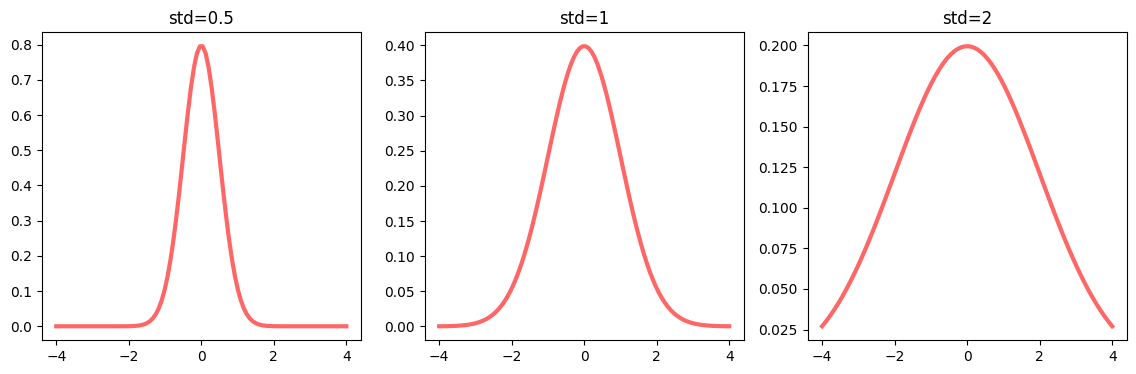

In [194]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# plt.figure()
_, axes = plt.subplots(1, 3, figsize=(14, 4))

x = np.linspace(-4, 4, 100)
for i, s in enumerate([1 / 2, 1, 2]):
    axes[i].plot(x, norm.pdf(x, 0, s), 'r-', lw=3, alpha=0.6, label='norm pdf')
    axes[i].set_title(f'std={s}')


### Gaussian Anomaly Detection Algorithm

For each relevant feature $\Large{j}$ of $\Large{n}$
1. Compute parameters $\mu_{1},\mu_{2}..., \mu_{n},\quad \sigma_{1},\sigma_{2}..., \sigma_{n}, $ of Gaussian distribution that associates with this feature
$$ \Large{\mu_{j} =\frac{1}{m} \sum_{i=1}^{m}{x_{j}^{(i)}}},  \quad
\Large{\sigma_{j}^2 =\frac{1}{m} \sum_{i=1}^{m}{(x_{j}^{(i)}-\mu_{j})^2}}, $$ 

$\Large{m}$ - number of observations

2. Being based on estimated Normal distribution, compute probabiliies of every record

$$ \Large{p(x) = \prod_{j=1}^{n}{p_{j}}  = \prod_{j=1}^{n}{p(x_{j}|\mu_{j},\sigma_{j}})}  =
\prod_{j=1}^{n}{\frac{1}{\sigma_j\sqrt{2 \pi}}} e^ {- \Large {\frac{(x_j-\mu_j)^2}{2\sigma_j^2}}}$$ 
3. Evaluate model by selecting $\Large{\epsilon}$ that has best metric (e.g.f1-score) on validation set 
<br>**Note**: You may define ${\epsilon}$ manually observing the amount of outliers on training set 

4. Mark record as anomaly if $$\Large{p(x) < \epsilon}$$

## Limitations and Considerations

- **Assumption of Normality and Independence:**
  The method relies on the assumption that the features follow a normal distribution and are statistically independent. In real-world scenarios, these assumptions may not hold, which can limit the performance of the method.

- **Simplicity vs. Complexity:**
  While Gaussian anomaly detection is simple and interpretable, it might not capture complex relationships in high-dimensional data. More advanced models can handle intricate data distributions and interactions among features, potentially providing better detection performance in complex settings.



## Implementation

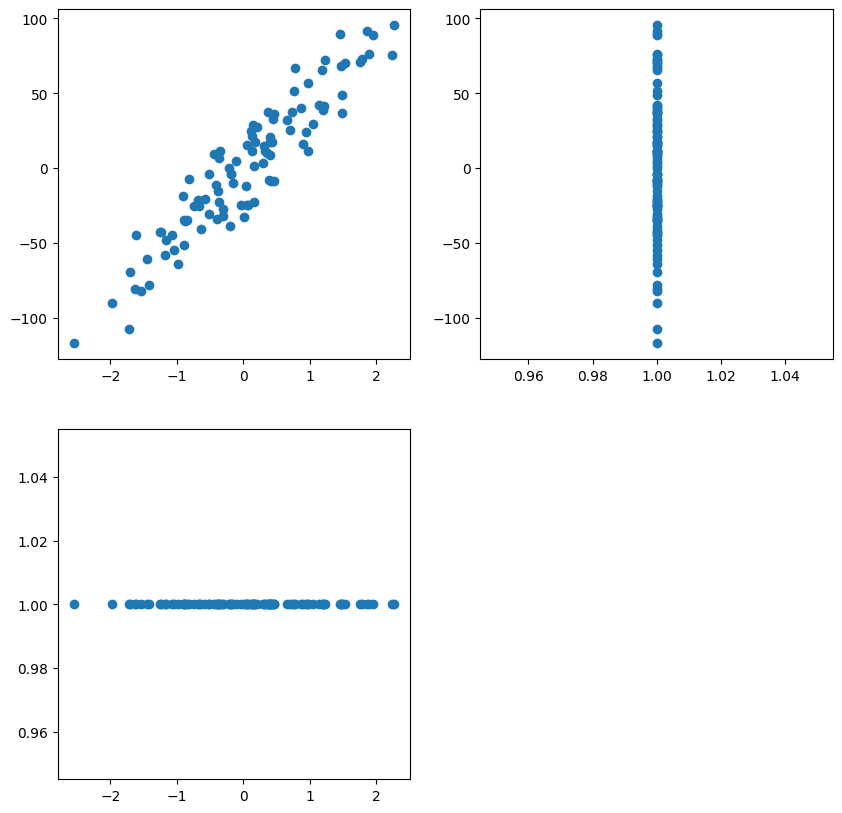

In [195]:
np.random.seed(0)
from sklearn.datasets import make_regression

X_R1, y_R1 = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    bias=0,
    noise=15,
)

# _, subaxes = plt.subplots(2, 2, figsize=(5,20))
plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 2, 1)
ax.scatter(X_R1, y_R1)
ax = plt.subplot(2, 2, 3)
ax.scatter(X_R1, [1] * len(X_R1))
ax = plt.subplot(2, 2, 2)
ax.scatter([1] * len(y_R1), y_R1)

### Add outlier to dataset

In [196]:
outlier = np.array([-1, 50]).reshape(1, -1)
X = np.r_[np.c_[X_R1, y_R1], outlier]
X_demo = X.copy()
X[-5:, :]

array([[ -0.36274117,   6.9858613 ],
       [  0.3563664 ,  10.12431371],
       [ -1.61389785, -44.94433636],
       [ -1.18063218, -58.10920047],
       [ -1.        ,  50.        ]])

In [197]:
np.shape(X_demo)

(101, 2)

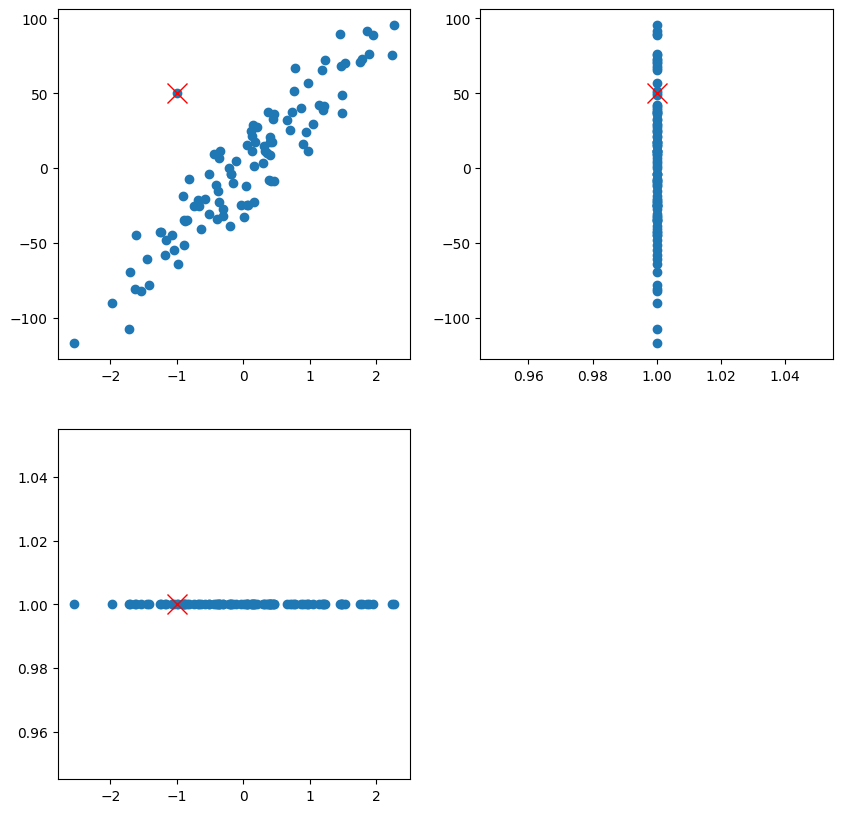

In [198]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 2, 1)
ax.scatter(X[:, 0], X[:, 1])
ax.plot(-1, 50, 'rx', markersize='15')
ax = plt.subplot(2, 2, 3)
ax.scatter(X[:, 0], [1] * len(X[:, 0]))
ax.plot(-1, 1, 'rx', markersize='15')
ax = plt.subplot(2, 2, 2)
ax.scatter([1] * len(X[:, 1]), X[:, 1])
ax.plot(1, 50, 'rx', markersize='15')

### Estimate mean and std, and compute PDF for each feature

In [199]:
mu = np.zeros(X.shape[1])
std = np.zeros(X.shape[1])
p = np.zeros(X.shape)
for i in range(X.shape[1]):
    mu[i] = X[:, i].mean()
    std[i] = X[:, i].std()
    p[:, i] = norm.pdf(X[:, i], mu[i], std[i])

print('np.shape=', p.shape)
print('p[:5,:]=\n', p[:5, :])

np.shape= (101, 2)
p[:5,:]=
 [[0.36441359 0.00755979]
 [0.25920703 0.00849273]
 [0.37211799 0.00857603]
 [0.27443505 0.00850763]
 [0.25689405 0.0063255 ]]


### Compute probability for each reacord of dataset using pdfs

In [200]:
p_anomaly = np.prod(p, axis=1)
print('p_anomaly.shape=', p_anomaly.shape)
print('p_anomaly[:5]=\n', p_anomaly[:5])

p_anomaly.shape= (101,)
p_anomaly[:5]=
 [0.00275489 0.00220138 0.00319129 0.00233479 0.00162498]


### Label outliers

In [201]:
import pandas as pd


def get_anomalies(p_anomaly):
    res = []
    for eps in np.linspace(p_anomaly.min(), p_anomaly.max(), 100):
        anomalies = np.where(p_anomaly < eps)[0]  # it returns tuple thus it requires to take first element or use
        regular = np.where(p_anomaly >= eps)[0]
        n_anomalies = len(p_anomaly[anomalies])
        res.append([eps, n_anomalies, anomalies, regular])
    df = pd.DataFrame(res, columns=['eps', 'n_anomalies', 'anomalies', 'regular']).head(10)
    return df


df = get_anomalies(p_anomaly)
df

,eps,n_anomalies,anomalies,regular
0,0.000004,0,[],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,0.000039,2,"[64, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,0.000073,4,"[57, 63, 64, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,0.000108,7,"[26, 43, 57, 63, 64, 69, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,0.000142,7,"[26, 43, 57, 63, 64, 69, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,0.000177,9,"[21, 26, 43, 57, 63, 64, 69, 70, 75]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,0.000211,11,"[12, 18, 21, 26, 43, 57, 63, 64, 69, 70, 75]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."
7,0.000245,13,"[12, 17, 18, 21, 26, 42, 43, 57, 63, 64, 69, 7...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."
8,0.000280,15,"[12, 17, 18, 21, 26, 42, 43, 48, 51, 57, 63, 6...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."
9,0.000314,15,"[12, 17, 18, 21, 26, 42, 43, 48, 51, 57, 63, 6...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."


### Visualize outliers

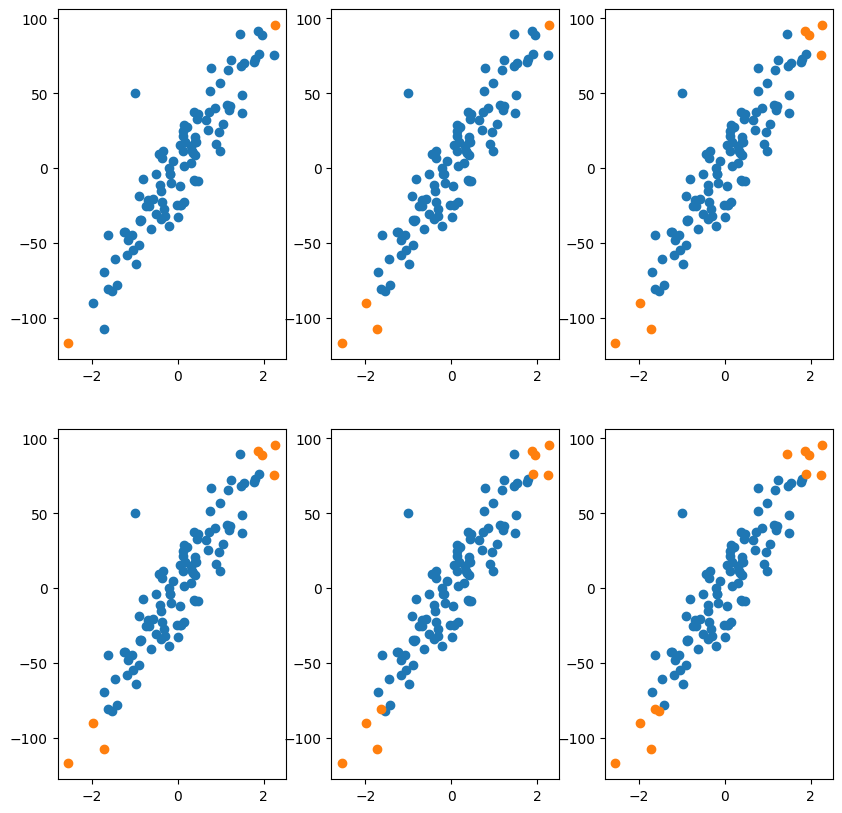

In [202]:
plt.figure(figsize=(10, 10))
for i in range(1, 7):  # skip case of no outliers
    ax = plt.subplot(2, 3, i)
    #     ax.scatter(X[:,0],X[:,1])
    regulars = X[df.iloc[i, 3]]
    ax.scatter(regulars[:, 0], regulars[:, 1])
    outliers = X[df.iloc[i, 2]]
    ax.scatter(outliers[:, 0], outliers[:, 1])  # ,marker='x',s=80, c='r',alpha=0.6)

#### Note: It does not capture the multi-feature outlier `[-1,50]`. This is drawback of using product of probabilities of each feature

# Multivariate Gaussian Distribution

This resolves the case when the anomaly cannot be captured by analyzing features separately

Instead of computing separately $\Large{p_1,p_2,...p_n}$ compute parameters of multivariate gaussian distribution
$$\Large {\mu \in \mathbb{R}^n,\quad \Sigma \in \mathbb{R}^{(n \times n)}}$$

<font size="5">


$$ p(x|\mu,\Sigma)  = \frac{1}{\sqrt{(2 \pi)^n  |\Sigma|}} e^ {\large{-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu)}}$$
$$ \mu =\frac{1}{m} \sum_{i=1}^{m}{x^{(i)}},  \quad
\Sigma =\frac{1}{m} \sum_{i=1}^{m}{(x^{(i)}-\mu)(x^{(i)}-\mu)^T} $$ 

where:

- $x \in \mathbb{R}^n$ is the feature vector
- $\mu \in \mathbb{R}^n$ is the mean vector
- $\Sigma \in \mathbb{R}^{n \times n}$ is the covariance matrix
- $|\Sigma|$ denotes the determinant of $\Sigma$
- $\Sigma^{-1}$ is the inverse of $\Sigma$

The diagonal elements of $\Sigma$ represent the variances of each feature, whereas the off-diagonal elements capture covariances between features, allowing the model to account for correlations.
</font>






<img src = "img/multivariate_0.png" height=300 width=180 align="left">
<img src = "img/multivariate_1.png" height=300 width=180 align="left">
<img src = "img/multivariate_2.png" height=300 width=180 align="left">
<img src = "img/multivariate_3.png" height=300 width=180 align="left">
<img src = "img/multivariate_4.png" height=300 width=180 align="left">

<img src = "img/multivariate_5.png" height=300 width=180 align="left">
<img src = "img/multivariate_6.png" height=300 width=180 align="left">
<img src = "img/multivariate_7.png" height=300 width=180 align="left">
<img src = "img/multivariate_8.png" height=300 width=180 align="left">
<img src = "img/multivariate_9.png" height=300 width=180 align="left">

## Explanation of the plots

The provided plots illustrate examples of 2D Gaussian (normal) distributions with different parameter settings. You can see two views:

1. **3D Surface Plot**.
   This plot shows the probability density function (PDF) as a three-dimensional surface. The z-axis represents the value of the PDF at each point $(x_1, x_2)$. The highest point on the surface corresponds to the mean $\mu$ of the distribution.

2. **Contour Plot / Heatmap**.
   This view displays a top-down or 2D perspective of the PDF, where contour lines (or varying colors) represent areas of equal probability density. The shape and orientation of these contours are determined by the covariance matrix $\Sigma$:
   - **Shifting the Center $\mu$**.
     Adjusting $\mu$ changes the center of the distribution. For instance, if $\mu = (\mu_1, \mu_2)$, then the highest density region will be located at $(\mu_1, \mu_2)$.
   - **Changing the Covariance $\Sigma$**.
     The covariance matrix controls how spread out the distribution is and in which directions.
     - If $\Sigma$ is a scalar multiple of the identity matrix, the contours are circular (isotropic).
     - If $\Sigma$ has different variances or non-zero off-diagonal elements, the contours become elliptical (and possibly rotated), indicating correlations between features.

---

## Algorithm Logic for the Multivariate Gaussian Distribution

Instead of calculating individual probabilities $(p_1, p_2, \dots, p_n)$ for each feature separately and multiplying them, this approach models all features jointly via a **multivariate Gaussian distribution**, capturing any correlations among them.

### The Joint Probability Density Function

For an $n$ -dimensional feature vector $x$, the PDF of the multivariate Gaussian is given by:

$$
p(x \mid \mu, \Sigma)
= \frac{1}{\sqrt{(2\pi)^n \, |\Sigma|}}
\exp\!\Bigl(-\tfrac{1}{2}\,(x - \mu)^\mathsf{T} \,\Sigma^{-1}\,(x - \mu)\Bigr),
$$



---

### Estimating Parameters from Data

Given $m$ training examples $\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$:

1. **Mean $\mu$**.
   $$
   \mu = \frac{1}{m} \sum_{i=1}^m x^{(i)}.
   $$

2. **Covariance Matrix $\Sigma$**.
   $$
   \Sigma
   = \frac{1}{m} \sum_{i=1}^m \bigl(x^{(i)} - \mu\bigr)\,\bigl(x^{(i)} - \mu\bigr)^\mathsf{T}.
   $$



---

### Advantages of the Multivariate Approach

- **Capturing Feature Correlation**.
  In many real-world scenarios, features are correlated. A purely univariate approach (multiplying per-feature probabilities) presumes independence and may fail to model correlated dimensions accurately. The multivariate Gaussian handles these correlations via $\Sigma$.

- **Better Modeling of Complex Data**.
  Complex, higher-dimensional data often have interdependent features. Accounting for these relationships typically yields more accurate probability estimates, improving tasks like anomaly detection.

### Implement anomaly detection using multivariate normal distribution 

In [203]:
mu_mv = X.mean(axis=0)
print('mu_mv.shape=', mu_mv.shape)
m = X.shape[0]


def compute_sigma_mv(x):
    res = np.zeros((x.shape[1], x.shape[1]))
    for i in range(x.shape[0]):
        res += x[i, :].reshape(1, -1).T * x[i, :].reshape(1, -1)
    return res / x.shape[0]

X_centered = X - mu_mv
sigma_mv = compute_sigma_mv(X_centered)
print('sigma_mv.shape=', sigma_mv.shape)
print('sigma_mv:\n', sigma_mv)

# probably this may or even should be used:
print('\nUsing np.cov to compare')
cov = np.cov((X - mu_mv),
             rowvar=False, ddof=0)  # If `rowvar` is True (default), then each row represents a    variable, with observations in the columns. Otherwise, the relationshipis transposed: each column rep
print('cov.shape=', sigma_mv.shape)
cov


mu_mv.shape= (2,)
sigma_mv.shape= (2, 2)
sigma_mv:
 [[1.01677955e+00 4.24773401e+01]
 [4.24773401e+01 2.11449453e+03]]

Using np.cov to compare
cov.shape= (2, 2)


array([[1.01677955e+00, 4.24773401e+01],
       [4.24773401e+01, 2.11449453e+03]])

In [204]:
from scipy.stats import multivariate_normal

p_mutlivar = multivariate_normal.pdf(X, mean=mu, cov=sigma_mv)
p_mutlivar

array([7.32919335e-03, 1.59418955e-03, 7.36985843e-03, 2.04299689e-03,
       5.50370264e-03, 5.87314211e-03, 2.38880310e-03, 7.97553847e-03,
       4.88694973e-03, 6.10054263e-03, 6.54811337e-03, 8.06523696e-03,
       1.56393428e-03, 5.07386731e-03, 6.88247496e-03, 3.03605502e-03,
       8.15915967e-03, 1.93724035e-03, 9.34664775e-04, 6.02678804e-03,
       3.78670226e-03, 1.58051039e-03, 2.35948867e-03, 8.23417943e-03,
       3.68823592e-03, 1.09034007e-03, 1.32758225e-03, 8.18164928e-03,
       2.90056181e-03, 2.72164214e-03, 4.22771924e-03, 6.90127492e-03,
       4.04734315e-03, 3.94556940e-03, 1.71984943e-03, 5.07686090e-03,
       3.86302959e-03, 7.33544133e-03, 3.11035908e-03, 3.19174752e-03,
       3.80733903e-03, 8.03812916e-03, 1.86756804e-03, 5.12974494e-04,
       7.30430573e-03, 2.25728885e-03, 2.23276242e-03, 5.71301621e-03,
       2.00070040e-03, 3.04997592e-03, 3.06958838e-03, 1.80695148e-03,
       2.48513223e-03, 3.03729365e-03, 4.61163848e-03, 7.85475299e-03,
      

In [205]:
df = get_anomalies(p_mutlivar)
df

,eps,n_anomalies,anomalies,regular
0,1.942939e-08,0,[],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,8.368985e-05,1,[100],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,1.673603e-04,1,[100],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,2.510307e-04,1,[100],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,3.347011e-04,3,"[57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,4.183715e-04,3,"[57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,5.020420e-04,3,"[57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,5.857124e-04,4,"[43, 57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
8,6.693828e-04,4,"[43, 57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
9,7.530532e-04,4,"[43, 57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


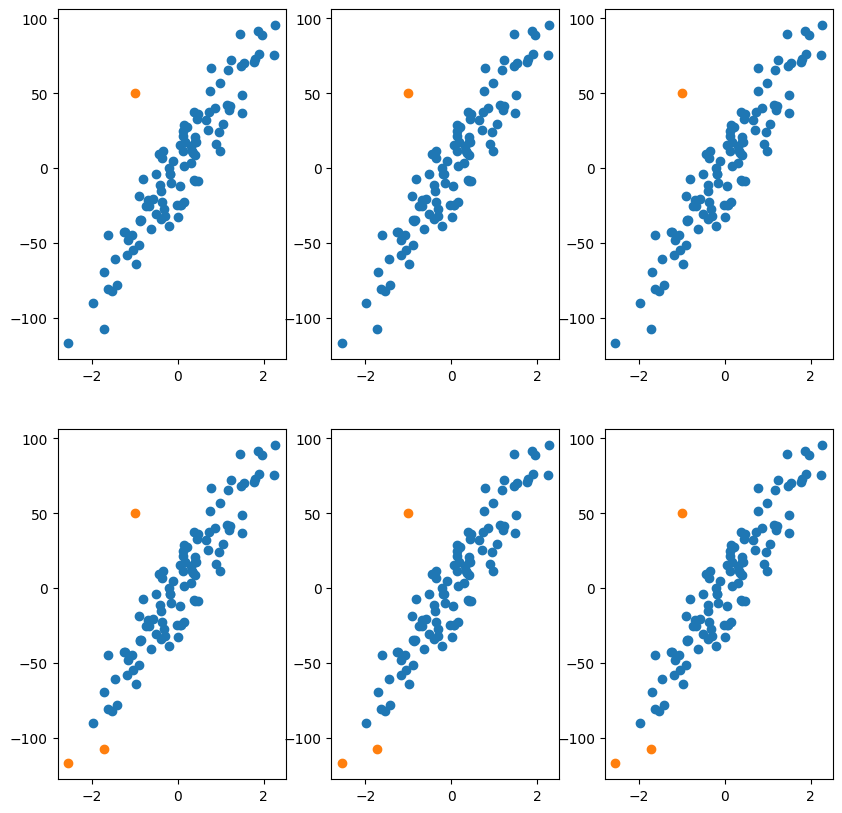

In [206]:
plt.figure(figsize=(10, 10))
for i in range(1, 7):  # skip case of no outliers
    ax = plt.subplot(2, 3, i)
    #     ax.scatter(X[:,0],X[:,1])
    regulars = X[df.iloc[i, 3]]
    ax.scatter(regulars[:, 0], regulars[:, 1])
    outliers = X[df.iloc[i, 2]]
    ax.scatter(outliers[:, 0], outliers[:, 1])  # ,marker='x',s=80, c='r',alpha=0.6)


#### Now it detects multifeature outliers

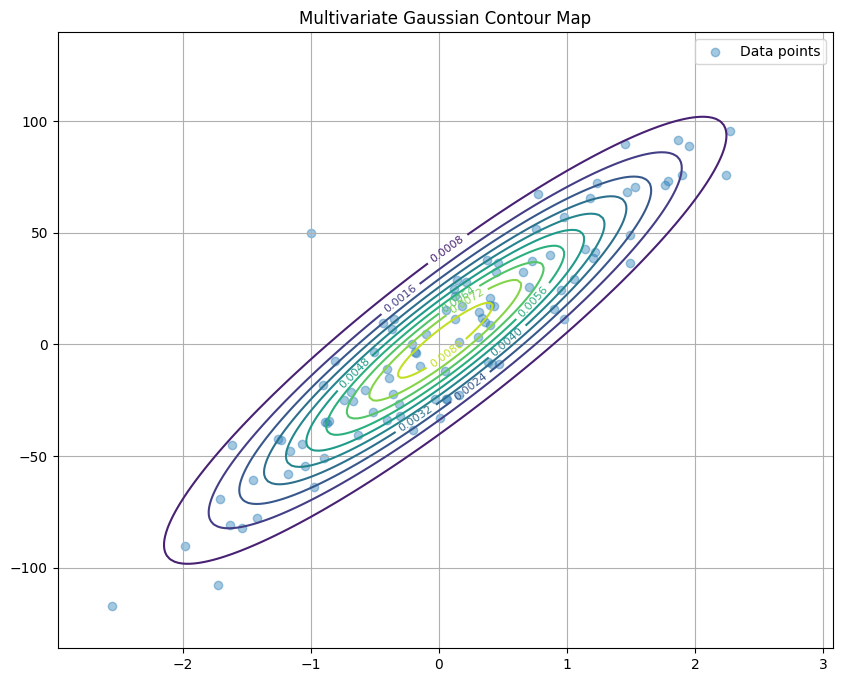

In [207]:
std_x = np.sqrt(sigma_mv[0, 0])
std_y = np.sqrt(sigma_mv[1, 1])

x_min, x_max = mu_mv[0] - 3 * std_x, mu_mv[0] + 3 * std_x
y_min, y_max = mu_mv[1] - 3 * std_y, mu_mv[1] + 3 * std_y

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
rv = multivariate_normal(mean=mu_mv, cov=sigma_mv)
grid = np.column_stack([xx.ravel(), yy.ravel()])
zz = rv.pdf(grid).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, label='Data points')
contour = plt.contour(xx, yy, zz, levels=10, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.title("Multivariate Gaussian Contour Map")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
plt.legend()
plt.show()

# Sklearn: EllipticEnvelope

Implementation of Multivariate Gaussian Distribution

In [208]:
from sklearn.covariance import EllipticEnvelope

### Default outliers_fraction = 0.1

In [209]:
algorithm = EllipticEnvelope(random_state=2021).fit(X)
y_pred = algorithm.predict(X)
y_pred

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1])

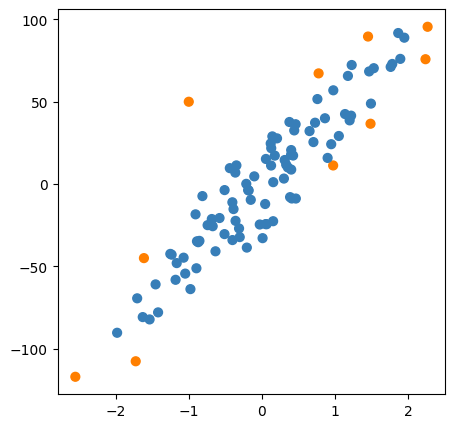

In [210]:
plt.figure(figsize=(5, 5))
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(X[:, 0], X[:, 1], s=40, color=colors[(y_pred - 1) // 2])


### Review for various outliers_fraction values

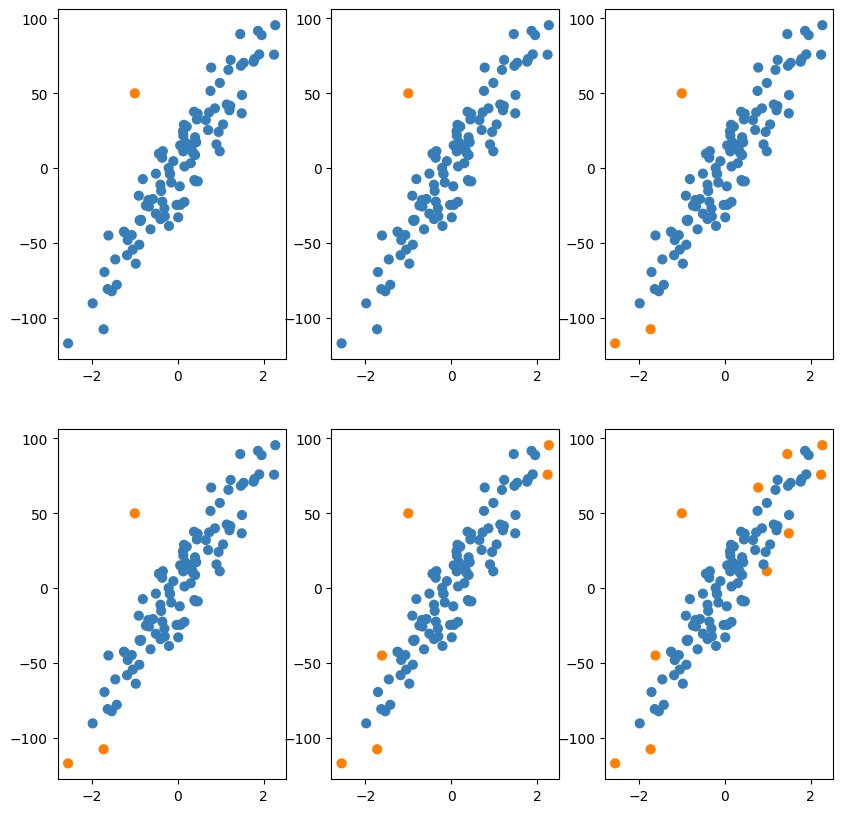

In [211]:
plt.figure(figsize=(10, 10))

outliers_fraction = [.007, .01, .02, .03, .05, .1]
for i, of in enumerate(outliers_fraction):
    ax = plt.subplot(2, 3, i + 1)

    algorithm = EllipticEnvelope(contamination=of, random_state=2021).fit(X)
    y_pred = algorithm.predict(X)

    ax.scatter(X[:, 0], X[:, 1], s=40, color=colors[(y_pred - 1) // 2])

# Other algorithms(Sklearn Example)


For each dataset, 15% of samples are generated as random uniform noise. This
proportion is the value given to the nu parameter of the OneClassSVM and the
contamination parameter of the other outlier detection algorithms.
Decision boundaries between inliers and outliers are displayed in black
except for Local Outlier Factor (LOF) as it has no predict method to be applied
on new data when it is used for outlier detection.

- `sklearn.svm.OneClassSVM` is known to be sensitive to outliers and
thus does not perform very well for outlier detection. This estimator is best
suited for novelty detection when the training set is not contaminated by
outliers. That said, outlier detection in high-dimension, or without any
assumptions on the distribution of the inlying data is very challenging, and a
One-class SVM might give useful results in these situations depending on the
value of its hyperparameters.

- `sklearn.covariance.EllipticEnvelope` assumes the data is Gaussian and
learns an ellipse. It thus degrades when the data is not unimodal. Notice
however that this estimator is robust to outliers.

- `sklearn.ensemble.IsolationForest` and `sklearn.neighbors.LocalOutlierFactor` seem to perform reasonably well
for multi-modal data sets. The advantage of
`sklearn.neighbors.LocalOutlierFactor` over the other estimators is
shown for the third data set, where the two modes have different densities.
This advantage is explained by the local aspect of LOF, meaning that it only
compares the score of abnormality of one sample with the scores of its
neighbors.

While these examples give some intuition about the algorithms, this
intuition might not apply to very high dimensional data.

Finally, note that parameters of the models have been here handpicked but
that in practice they need to be adjusted. In the absence of labelled data,
the problem is completely unsupervised so model selection can be a challenge.


## Generate datasets

In [212]:
import time

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

In [213]:
# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=42),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

In [214]:
# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
            make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
            - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

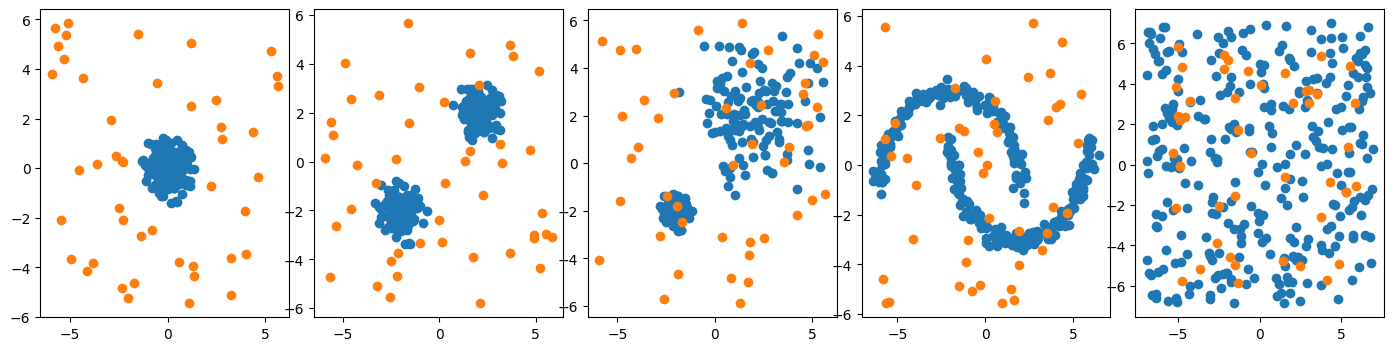

In [215]:
rng = np.random.RandomState(42)

_, subaxes = plt.subplots(1, 5, figsize=(14, 4))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.subplots_adjust(left=.02, right=.98, wspace=.1)
for ax, X in zip(subaxes, datasets):
    outliers = rng.uniform(low=-6, high=6, size=(n_outliers, 2))
    ax.scatter(X[:, 0], X[:, 1])
    ax.scatter(outliers[:, 0], outliers[:, 1])

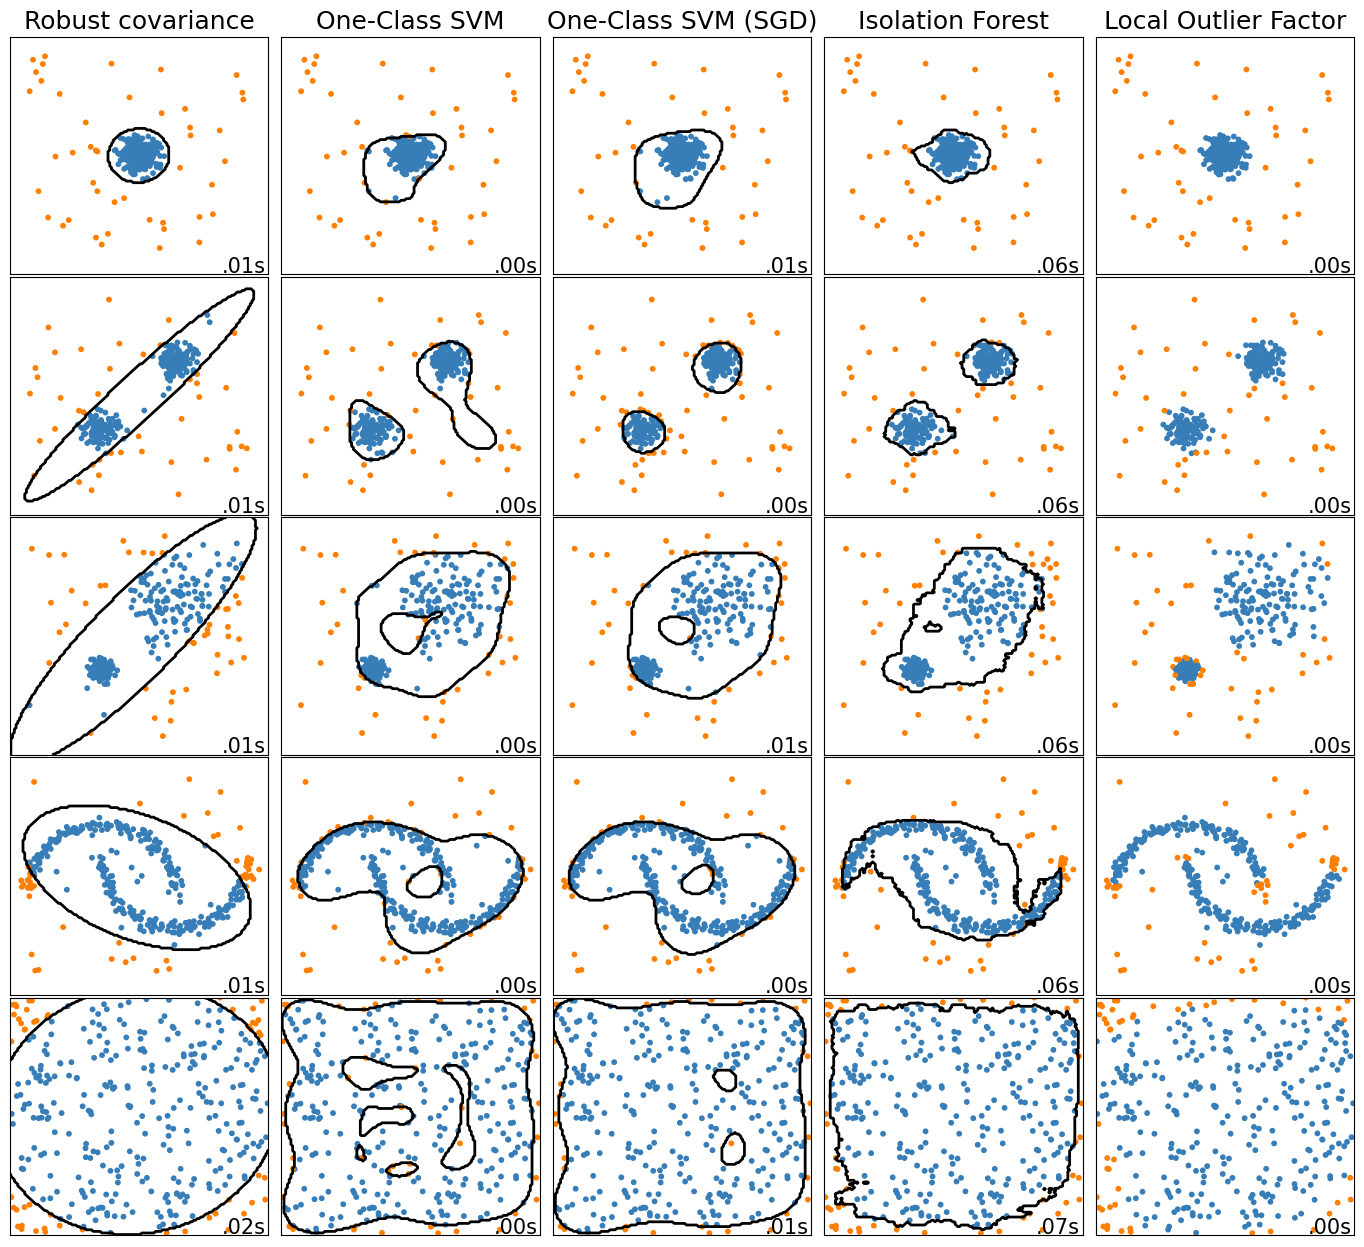

In [216]:
# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#ff7f00", "#377eb8"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

# How to classify  unseen data if algorithm supports only fit

Let's show on DBSCAN algorithm 

### Recall DBSCAN

Here we will instantiate DBSCAN with a ε-neighbourhood length of 0.05, and 5 to be the minimum number of samples required for an instance to be considered a core instance

In [217]:
from sklearn.cluster import DBSCAN

In [218]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X_demo)
dbscan = DBSCAN(eps=0.1)
dbscan.fit(X)
set(dbscan.labels_)

{np.int64(-1), np.int64(0)}

#### Note: `-1` are the outliers

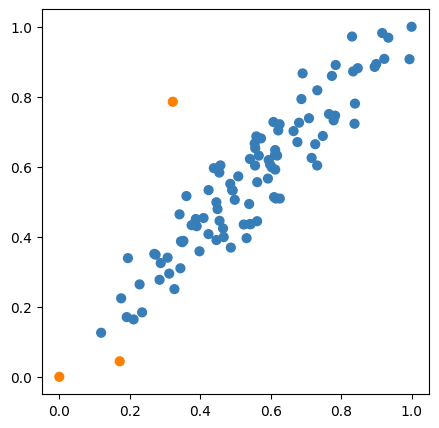

In [219]:
plt.figure(figsize=(5, 5))
outliers = np.where(dbscan.labels_ == -1, 0, 1)
plt.scatter(X[:, 0], X[:, 1], s=40, color=colors[outliers])

In [220]:
outliers

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

### Review DBSCAN for other datasets

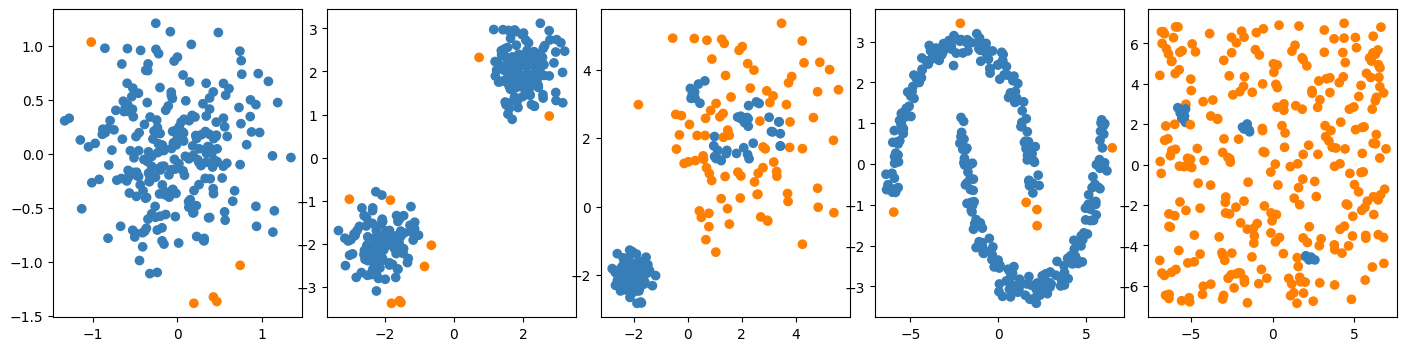

In [221]:
_, subaxes = plt.subplots(1, 5, figsize=(14, 4))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.subplots_adjust(left=.02, right=.98, wspace=.1)
for ax, X in zip(subaxes, datasets):
    dbscan = DBSCAN(eps=0.4, min_samples=5).fit(X)
    outliers = np.where(dbscan.labels_ == -1, 0, 1)
    ax.scatter(X[:, 0], X[:, 1], color=colors[outliers])

### Predict using DBSCAN

**Note**: The DBSCAN does not have a predict method, 
only a fit_predict method, meaning that it can’t cluster new instances. 

Instead, we can use a different classifier to train and predict on. For this example, let’s use a KNN

In [222]:
X = datasets[3]

from sklearn.cluster import DBSCAN

eps_target = 0.4
dbscan = DBSCAN(eps=eps_target).fit(X)

set(dbscan.labels_)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}

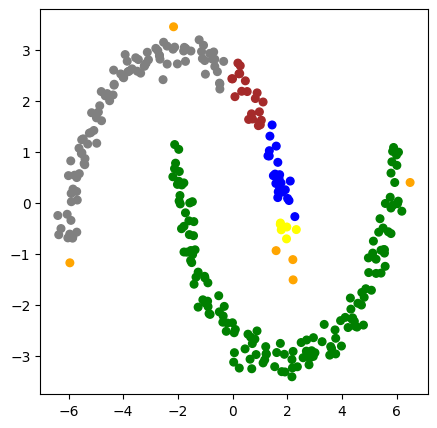

In [223]:
plt.figure(figsize=(5, 5))
colors6 = np.array(['green', 'blue', 'grey', 'brown', 'yellow', 'orange'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors6[dbscan.labels_])

In [224]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
# core_sample_indices_ : array, shape = [n_core_samples] Indices of core samples.
# components_ : array, shape = [n_core_samples, n_features] Copy of each core sample found by training.

knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5, 0], [0, 1.5], [1, -0.1], [1.8, 1], [-3, -2], [-3, 2.5]])
prediction = knn.predict(X_new)
prediction



array([0, 3, 1, 1, 0, 2])

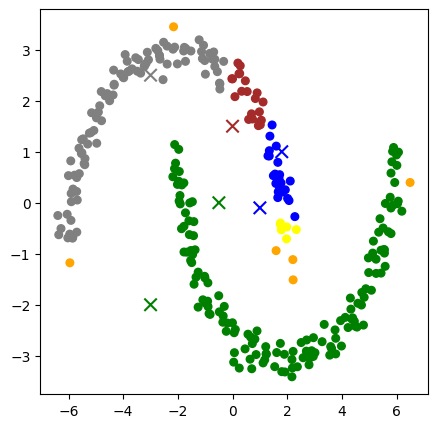

In [225]:
plt.figure(figsize=(5, 5))
colors6 = np.array(['green', 'blue', 'grey', 'brown', 'yellow', 'orange'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors6[dbscan.labels_])
plt.scatter(X_new[:, 0], X_new[:, 1], s=80, marker='x', color=colors6[prediction])

**Note**: However, we run into one problem: 
<br>we have given the KNN data without any outliers. 
<br>This is problematic, as it will force KNN to choose a cluster for new instances, even if the new instance is indeed an outlier.
To combat this, we leverage the kneighbors method of the KNN classifier, which, given a set of instances, returns the **distances and indices** of the k nearest neighbours of the training set. 
<br>We can then set a maximum distance, and if an instance exceeds that distance, we qualify it as an outlier


### Sanity Check 
Check the existing outliers are marked as outliers by KNN 

In [226]:
outliers = X[dbscan.labels_ == -1]
outliers

array([[-2.1580194 ,  3.44934436],
       [ 1.59316275, -0.9392648 ],
       [ 6.49575728,  0.39698968],
       [-5.95157641, -1.17774405],
       [ 2.21563946, -1.51183693],
       [ 2.2059929 , -1.11491072]])

In [227]:
y_dist, y_pred_idx = knn.kneighbors(outliers, n_neighbors=1)
y_dist

array([[0.40107031],
       [0.4460994 ],
       [0.56248591],
       [0.49336127],
       [0.83885328],
       [0.46773822]])

In [228]:
y_dist > eps_target

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Classify unseen data 

In [229]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_dist

array([[0.97074366],
       [0.73502134],
       [0.68489718],
       [0.22924926],
       [1.60185068],
       [0.28373858]])

In [230]:
new_y_pred = np.where(y_dist > eps_target, 1, 0).ravel()
new_y_pred
# y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

# y_pred
# y_pred[y_dist > 0.6] = -1
# y_pred.ravel()

array([1, 1, 1, 0, 1, 0])

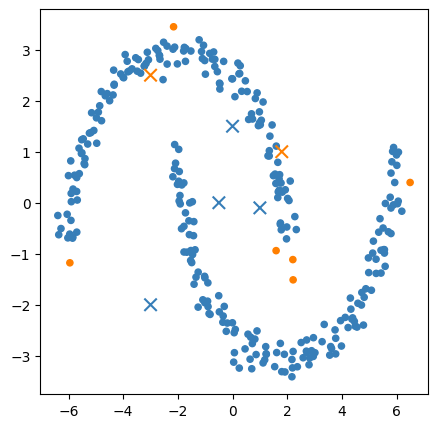

In [231]:
plt.figure(figsize=(5, 5))
outliers = np.where(dbscan.labels_ == -1, 0, 1)
plt.scatter(X[:, 0], X[:, 1], s=20, color=colors[outliers])

plt.scatter(X_new[:, 0], X_new[:, 1], s=80, marker='x', color=colors[new_y_pred])

# Visual method to detect outliers

In [232]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = np.array([45, 56, 78, 34, 1, 2, 67, 68, 87, 203, -200, -150])

# from  scipy import stats
# stats.describe(X)

pd.DataFrame(X).iloc[:, 0].describe()

count     12.000000
mean      24.250000
std      106.915536
min     -200.000000
25%        1.750000
50%       50.500000
75%       70.500000
max      203.000000
Name: 0, dtype: float64

<Axes: >

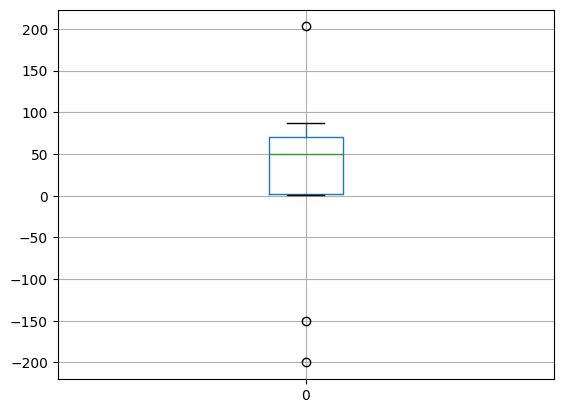

In [233]:
pd.DataFrame(X).boxplot()

<Axes: >

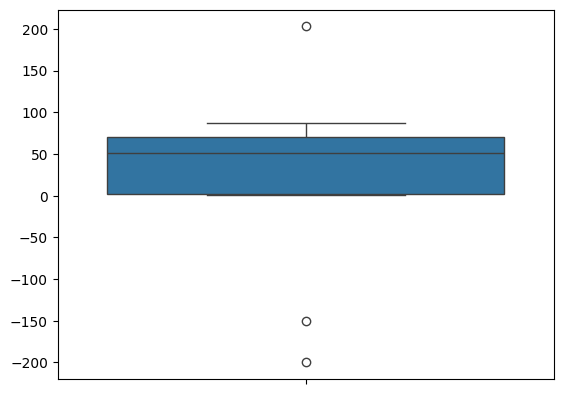

In [234]:
sns.boxplot(X)

#### Remove outliers : (X < 150) & (X > -50)


<Axes: >

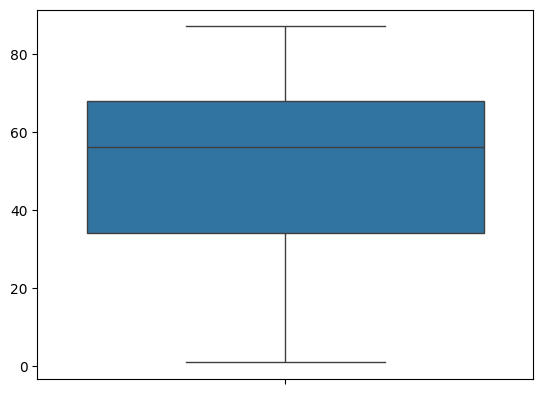

In [235]:
X = X[(X < 150) & (X > -50)]
sns.boxplot(X)

## Sample from data science test task

count    1.882400e+04
mean     1.783432e+05
std      6.445703e+05
min      7.499500e+03
25%      5.980000e+04
50%      9.047500e+04
75%      1.341625e+05
max      6.246806e+06
Name: price, dtype: float64


<Axes: >

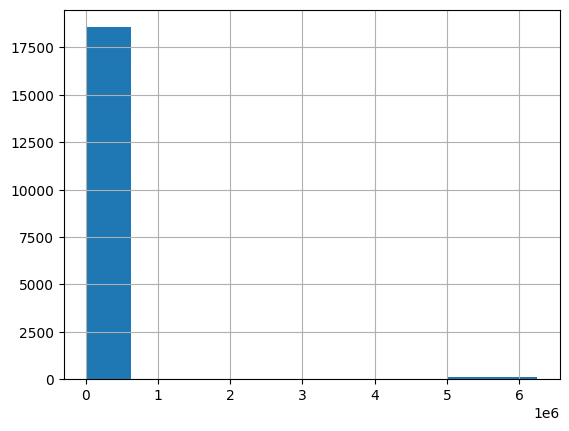

In [236]:
df = pd.read_csv('data_housing.csv', index_col=0)
col = 'price'
print(df[col].describe())
df[col].hist()

<Axes: ylabel='price'>

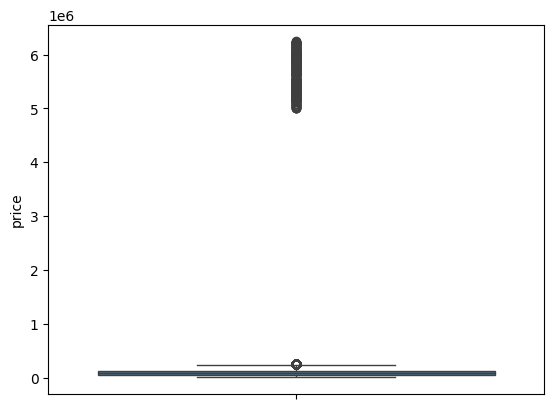

In [237]:
sns.boxplot(df[col])

#### Remove outliers : `price > 1e6`

<Axes: ylabel='price'>

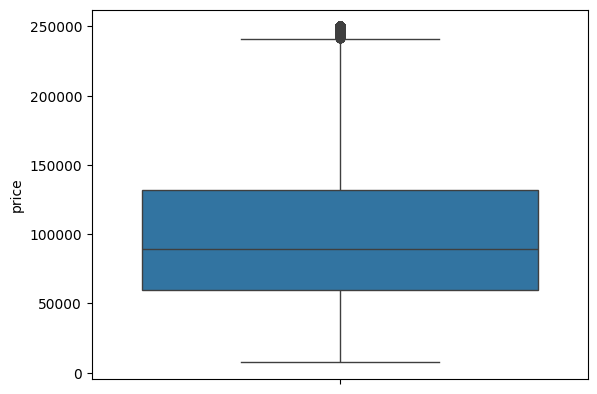

In [238]:
sns.boxplot(df[df[col] < 1e6][col])

## Label outliers being based on quartiles

<img src="img/quartiles.png" height="500" width="500" align="left" style="background-color: white;">

#### Usually all records beyound inetrval $\mu - 3\sigma < x < \mu + 3\sigma$ could be considered as outliers 

<Axes: ylabel='price'>

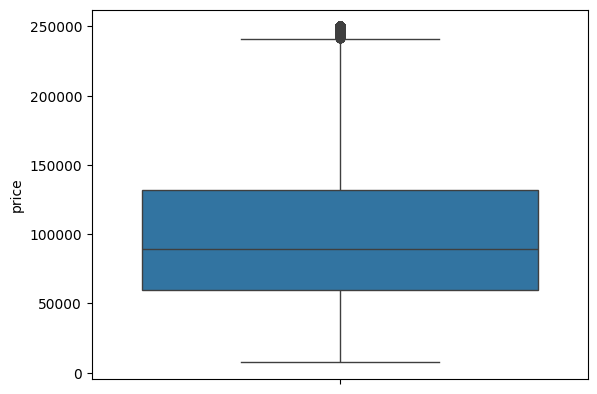

In [239]:
col_mean = df[col].mean()
col_std = df[col].std()
sns.boxplot(df[df[col] < col_mean + 3 * col_std][col])

#### Note: 
Depending on domain knowledge  you may scoose another range e.g. $ |x- \mu| >  10 *\sigma$  to label records as outliers 

## Z-Score

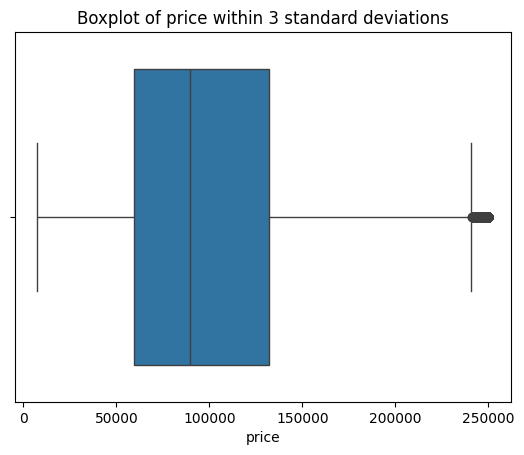

In [240]:
col_mean = df[col].mean()
col_std = df[col].std()

df['z_score'] = (df[col] - col_mean) / col_std

filtered = df[df['z_score'].abs() < 3]

sns.boxplot(x=filtered[col])
plt.title(f'Boxplot of {col} within 3 standard deviations')
plt.show()